In [23]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
import os
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')
### ======================================================================
npth='J:/Reanalysis/myOISST_198001_202212_sst.nc'


myindx='SAM'
varnm='ice'

t_rng=['1993-01', '2017-12']
lat_rng=[-75,-30]; lon_rng=[0,360]

wpth='C:/Users/shjo/OneDrive/mySO/Regression_H/'+myindx+'/'



In [24]:
with open('C:/Users/shjo/OneDrive/mySO/mySignals/mySAM.pkl', 'rb') as f:
    data = pickle.load(f)
mySAM_=data.loc[t_rng[0]:t_rng[-1]]
mySAM=mySAM_.rolling(window=12,center=True).mean()[6:-5].values.reshape(-1)
with open('C:/Users/shjo/OneDrive/mySO/mySignals/myMEI.pkl', 'rb') as f:
    data = pickle.load(f)
myMEI=data.loc[t_rng[0]:t_rng[-1]]
myMEI=myMEI.rolling(window=12,center=True).mean()[6:-5].values.reshape(-1)




In [25]:
time=mySAM_[6:-5].index
t_label=mySAM_[6:-5].index.strftime('%y')

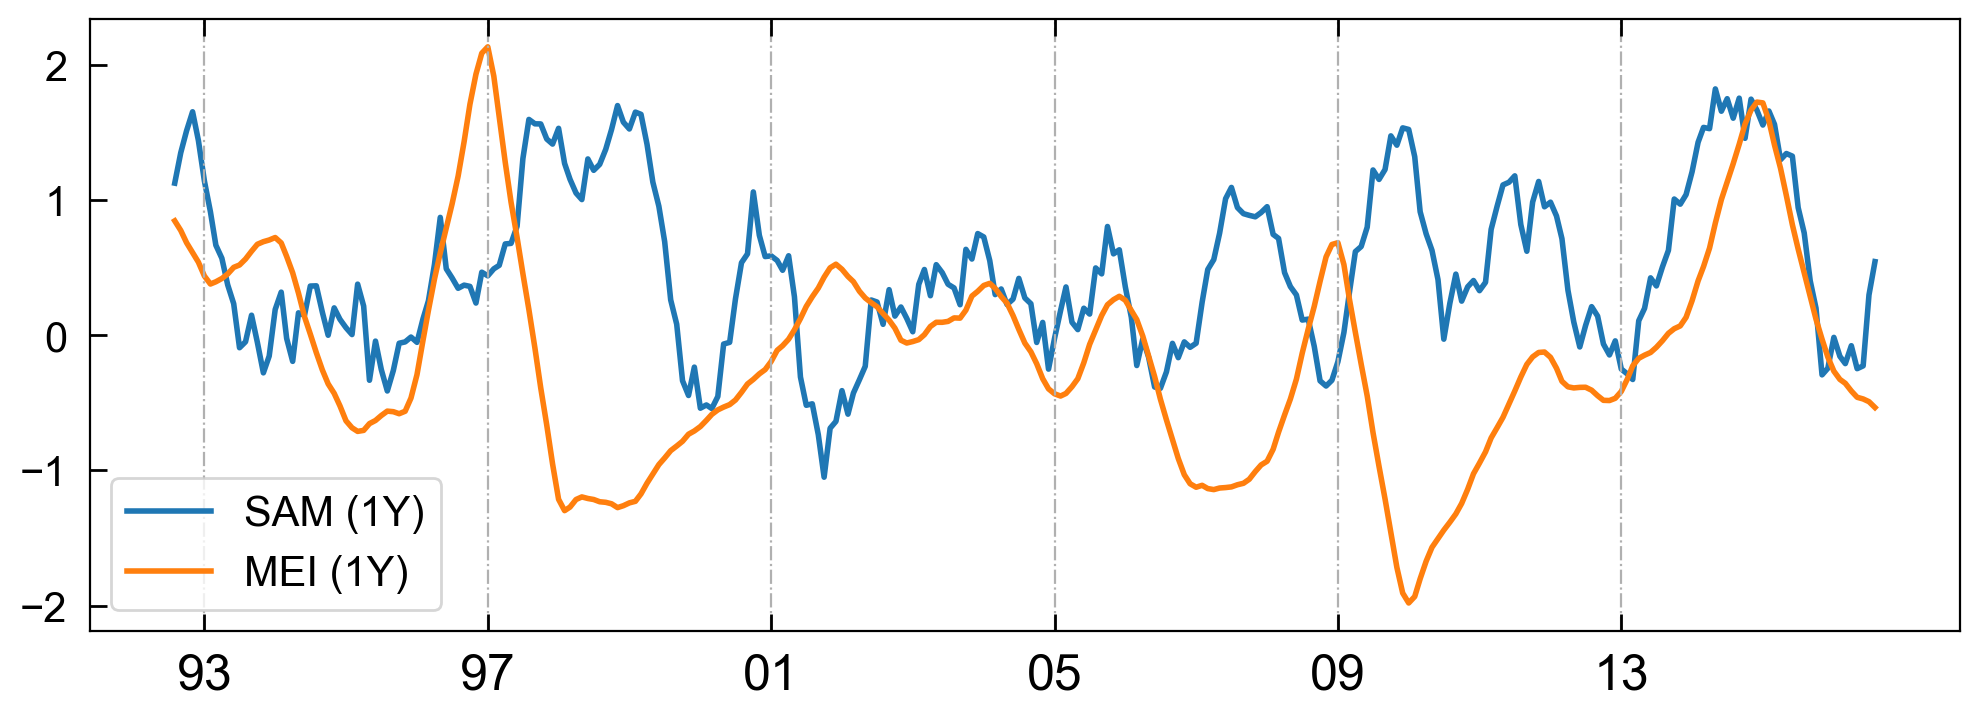

In [27]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(time,mySAM, label='SAM (1Y)',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(time,myMEI, label='MEI (1Y)',color='C1',linewidth=2,zorder=0)
# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = time[5::12*4]
xtick_labels = t_label[5::12*4]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-3)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()